Домашнее задание к семинару 02 (HW02)
Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.

2.3. Содержание ноутбука HW02.ipynb (основная часть)
В ноутбуке homeworks/HW02/HW02.ipynb необходимо выполнить следующие действия.


2.3.1. Загрузка данных и первичный осмотр


In [ ]:
import pandas as pd
import numpy as np
# будем отображать графики внутри ноутбука
%matplotlib inline
#увеличим размер по умолчанию рисуемых графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# pylab часть matplotlib, но ее уже не рекомендуют использовать. Пока же работает.
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [2]:
data = pd.read_csv('S02-hw-dataset.csv', sep=',')
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
data.head(n = 10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2. Пропуски, дубликаты и базовый контроль качества

In [5]:
fract = data.isna().mean()
print('доля пропусков:\n',fract)

доля пропусков:
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [6]:
print("дубликатов:", data.duplicated().sum())
data[data.duplicated(keep=False)]


дубликатов: 1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [7]:
# Функция для выявления проблемных записей
def detect_issues(data):
    labels = []
    # Проверка на отрицательные значения
    if (data[['purchases', 'age', 'user_id', 'revenue']] < 0).any():
        labels.append('negative_values')
    # Проверка на пропуски
    if data.isna().any():
        labels.append('missing_values')
    # Проверка на возраст больше 110
    if data['age'] > 110:
        labels.append('age>110')
    # Проверка на нулевые покупки при ненулевом доходе
    if (data['revenue'] == 0) and (data['purchases'] > 0):
        labels.append('revenue0_but_purchases>0')
    return '; '.join(labels) if labels else np.nan
# Применение функции к каждой записи
issues = data.apply(detect_issues, axis=1)
# Проверка на дубликаты
issues[data.duplicated()] = 'duplicate_record'
# Вывод проблемных записей
problematic = data[issues.notna()].copy()
problematic['issues'] = issues[issues.notna()]
problematic

,user_id,age,country,purchases,revenue,issues
4,5,NaN,DE,6,1296,missing_values
5,6,120.0,FR,-1,785,negative_values; age>110
10,11,24.0,US,4,0,revenue0_but_purchases>0
12,13,NaN,US,9,630,missing_values
40,10,24.0,RU,7,511,duplicate_record


Основные проблемы включают систематические пропуски в ключевых полях - значения возраста отсутствуют в нескольких записях (пользователи 4 и 13). Обнаружены логические противоречия и некорректные данные - отрицательное количество покупок у пользователя 6, что технически невозможно, а также случаи нулевой выручки при наличии покупок у пользователя 11, что указывает на ошибки в системе учета или сборе данных. Дополнительную озабоченность вызывают потенциальные аномалии - возраст пользователя 6 составляет 120 лет, что требует проверки на достоверность. Так же строка с индексом 40 дявляется дубликатом.

2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [8]:
country_counts = data['country'].value_counts()
print(country_counts/len(data))# доля по странам

country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: count, dtype: float64


In [9]:
group = data.groupby('country')
group.size()

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [10]:
# Статистика по доходам в разбивке по странам
group['revenue'].agg(['mean', 'min', 'max'])

,mean,min,max
country,,,
CN,1054.000000,456,1652
DE,1445.500000,702,2475
FR,675.916667,0,1608
RU,790.076923,0,2086
US,557.375000,0,980


По распределению пользователей доминируют Россия (31.7%) и Франция (29.3%), вместе составляющие более 60% всей пользовательской базы. США (19.5%) и Германия (14.6%) занимают средние позиции, тогда как Китай (4.9%) представлен минимально.

При анализе средних показателей выявляется интересная картина: хотя Германия имеет наименьшую долю пользователей после Китая, она демонстрирует наивысшие средние значения по выручке на пользователя (1445.5) и количеству покупок (6.5). При этом Россия и Франция, лидирующие по количеству пользователей, показывают относительно скромные средние показатели выручки (около 790 на пользователя).

In [11]:
df = data.copy()
df.drop(problematic.index, inplace=True, errors='ignore')# удаляем проблемные записи
cuted = pd.cut(df['age'], 3, labels=['Молодые', 'Средние', 'Старшие'], include_lowest=True)
df['age'] = cuted
df.groupby('age')['revenue'].agg(['mean', 'min', 'max'])

/tmp/ipykernel_2602/3027652301.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age')['revenue'].agg(['mean', 'min', 'max'])


,mean,min,max
age,,,
Молодые,1015.400000,183,1652
Средние,933.421053,0,2475
Старшие,632.333333,0,1440


Анализ по возрастным группам выявил четкую тенденцию: молодые пользователи демонстрируют наивысшую среднюю выручку (1015.4), значительно опережая среднюю (933.4) и старшую (632.3) группы. При этом именно в молодой группе зафиксирован максимальный разброс значений - от минимальной выручки в 183 до максимальной в 1652.

2.4. Визуализация данных в Matplotlib

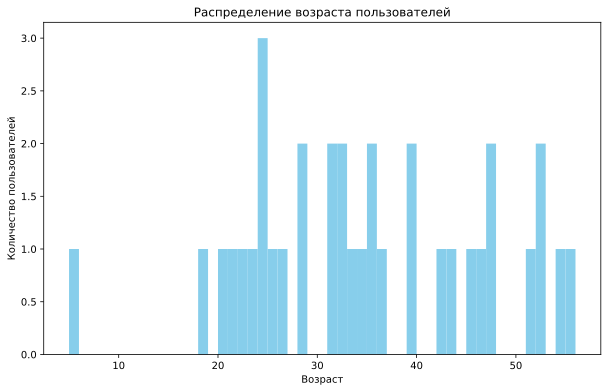

In [12]:
data_for_table1 = data['age'].copy()
data_for_table1.drop(problematic.index, inplace=True, errors='ignore')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(
    data_for_table1, 
    bins=np.arange(data_for_table1.min(), data_for_table1.max()),
    color='skyblue',
)
ax.set_title('Распределение возраста пользователей') # название графика
ax.yaxis.tick_left() # устанавливаем, что вертикальная ось должна быть слева
ax.set_xlabel('Возраст') # подпись горизонтальной оси
ax.set_ylabel('Количество пользователей') # подпись вертикальной оси
ax.xaxis.tick_bottom() # устанавливаем, что горизонтальная ось должна быть снизу
plt.show() # отображаем график

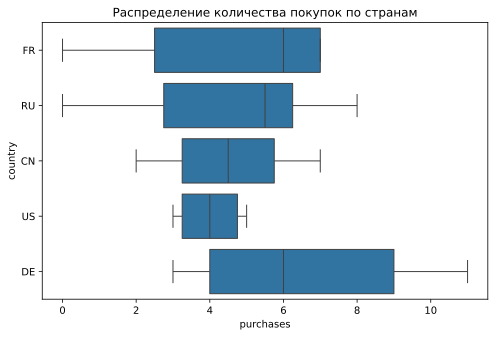

In [13]:
data_for_table2 = data.copy()
data_for_table2.drop(problematic.index, inplace=True, errors='ignore')

sns.boxplot(y="country", x="purchases", data=data_for_table2, orient="h")
plt.title('Распределение количества покупок по странам')
plt.savefig('figures/boxplot_purchases_by_country.svg')

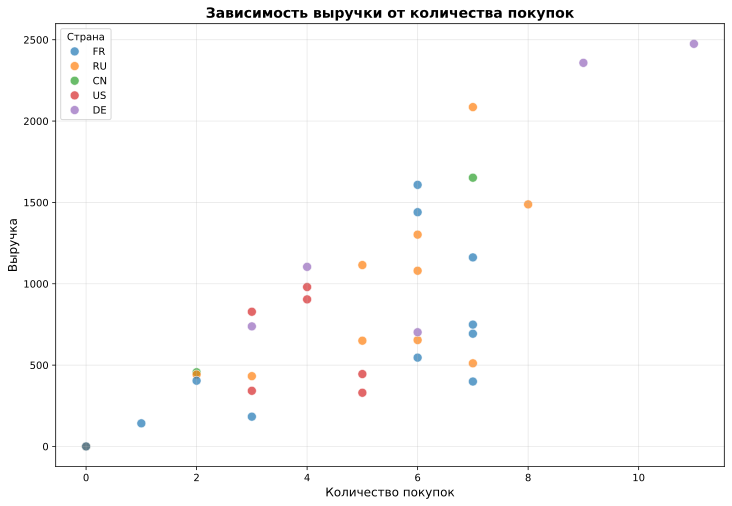

In [14]:
data_for_table3 = data.copy()
data_for_table3.drop(problematic.index, inplace=True, errors='ignore')
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data_for_table3, 
                x='purchases', 
                y='revenue', 
                hue='country',  # цвет по странам
                s=80, 
                alpha=0.7)

plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)
plt.savefig('figures/scatter_plot_purchases_by_country.svg')
plt.show()